### Задание
Нужно составить EDA-ноутбук в котором:

1. Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны
2. Построить график корреляции между средним доходом (PPP) и ценой подписки
3. Ответить на следующие вопросы:
    1. Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 
    2. Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента
    3. Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?
    4. Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?
    5. Какой процент среднего дохода россиянина будет составлять подписка Netflix?
    6. На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)
    7. В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

In [ ]:
# !pip install pycountry_convert

In [191]:
import json

import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import requests
import pycountry_convert as pc

### Obtaining & preprocess data

2 datasets from kaggle

In [20]:
sub_subscript_csv = 'https://storage.googleapis.com/kagglesdsdata/datasets/1865113/3045769/Netflix%20'\
                    'subscription%20fee%20Dec-2021.csv?X-Goog-Algorithm=GOOG4-RSA-SHA256&X-Goog-Crede'\
                    'ntial=gcp-kaggle-com%40kaggle-161607.iam.gserviceaccount.com%2F20220201%2Fauto%2'\
                    'Fstorage%2Fgoog4_request&X-Goog-Date=20220201T090507Z&X-Goog-Expires=259199&X-Goog'\
                    '-SignedHeaders=host&X-Goog-Signature=14c457727846bc56915e5bde5f09fe6765bc908ff4afb'\
                    'c0e26e71ace0b1d0fdc3e813b42e3b7df65f3bf33da81dc83cd04bd3b748d419ccf04a96b544dbde207'\
                    '18fae6afae9f65b3130c8bfe01f780a342d41b3015d1a9a617a4d07e9c891c227d444c0ce9895ab0207de'\
                    'ca8f13fda947eb0a7c430950b7dc8c4d288a463a8274e0cbc5984bab58bd19195aa45e62024a30770fb7e90490'\
                    '494fbd32cb2f3237e049344998f1071ceffd3cf08f753960373657b4e4d0908a1a950d8daf0522d7f7436e6ba'\
                    '409f11af016ef5879f3f83d87d5e2fe74c69c7f349e4ef26ba8f40e66464eeafb049276f048e31b2d778c80b5'\
                    'c0d8b7440071d4aa3ec86192ad8fb16'

In [21]:
price_diff_countries = ''\
    'https://storage.googleapis.com/kagglesdsdata/datasets/1865113/3045769/netflix'\
    '%20price%20in%20different%20countries.csv?X-Goog-Algorithm=GOOG4-RSA-SHA256&X'\
    '-Goog-Credential=gcp-kaggle-com%40kaggle-161607.iam.gserviceaccount.com%2F202'\
    '20201%2Fauto%2Fstorage%2Fgoog4_request&X-Goog-Date=20220201T090857Z&X-Goog-Ex'\
    'pires=259199&X-Goog-SignedHeaders=host&X-Goog-Signature=71d772e6605cd24e3f986'\
    '0193a847af73126cde01547fa9d96d4d4e666233e2035de53d8ab8bf9164f1a307c6851b9cc73'\
    '9329bb20fb5c326f155dc25fcc39e3292430f28a5de00912a7ab6b531403f164429544e8cd0a1'\
    '064c0e2d312863ae12c6f514dd7156b160c12b752aa12f08603762c0408910f9216f8de306024'\
    'd2b51dd54f224437770b7a112a3bd17d0f8664ba21feabbf00e6cb25e349a5f3b4891fb7df064'\
    '1a41d6d3334170b0c4cb9fbd9fa8d2240697f7180bfee387236630ef291b9e494615b59908f79'\
    '31e3d67965d22d0687038e5c61e26497aa42e129db05b1e54f31117efae9f7d41229eb6ab385f'\
    '0b310c9562780f5a7bc8ecd2dfeb8'

In [194]:
df_subscriptions = pd.read_csv(sub_subscript_csv)

In [195]:
df_prices = pd.read_csv(price_diff_countries)

In [196]:
df_prices.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74


In [197]:
df_subscriptions.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [198]:
df_subscriptions.Country.nunique()

65

#### Get information of incomes by countries from url

Возьмем данные с https://www.worlddata.info/average-income.php

In [288]:
df_income = pd.read_clipboard(thousands=',')

In [289]:
df_income.head()

,Rank,Country,Avg. income per year,Avg. income per month
0,1,Monaco,"186,080 $","15,507 $"
1,2,Bermuda,"112,240 $","9,353 $"
2,3,Switzerland,"82,620 $","6,885 $"
3,4,Luxembourg,"80,860 $","6,738 $"
4,5,Norway,"78,290 $","6,524 $"


In [290]:
df_income[['Avg. income per year', 'Avg. income per month']] = \
df_income[['Avg. income per year', 'Avg. income per month']].apply(lambda x: x.str.replace(',', '', regex=False)
                                                                              .str.replace('$', '', regex=False)\
                                                                   .astype(int))

In [292]:
df_income.head()

,Rank,Country,Avg. income per year,Avg. income per month
0,1,Monaco,186080,15507
1,2,Bermuda,112240,9353
2,3,Switzerland,82620,6885
3,4,Luxembourg,80860,6738
4,5,Norway,78290,6524


In [293]:
set(df_subscriptions.Country) - set(df_income.Country)

{'Argentina',
 'Chile',
 'Croatia',
 'Czechia',
 'Estonia',
 'Gibraltar',
 'Guatemala',
 'Honduras',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Moldova',
 'Paraguay',
 'Peru',
 'San Marino',
 'Slovakia',
 'Taiwan',
 'Uruguay',
 'Venezuela'}

In [ ]:
fill_dict_missing_countries = {
    'Argentina': 842,
    'Chile': 1286,
    'Czechia': ,
    'Estonia': ,
    'Gibraltar': ,
    'Honduras':,
    'Latvia': ,
    'Liechtenstein': ,
    'Lithuania': ,
    'Moldova': ,
    'Paraguay': ,
    'Peru': ,
    'San Marino':,
    'Slovakia': ,
    'Taiwan': ,
    'Uruguay': ,
    'Venezuela',
}

In [303]:
data_wages = pd.read_csv('data_wages.csv')

In [304]:
set(df_subscriptions.Country) - set(data_wages['ref_area.label'].unique())

{'Canada',
 'Gibraltar',
 'Hong Kong',
 'Liechtenstein',
 'Moldova',
 'Monaco',
 'Peru',
 'Russia',
 'South Korea',
 'Switzerland',
 'Taiwan',
 'Venezuela'}

In [305]:
data_wages.head()

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,classif2.label,time,obs_value,note_classif.label,note_indicator.label,note_source.label
0,Afghanistan,Mean nominal monthly earnings of employees by ...,LFS - Labour Force Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: U.S. dollars,2020,172.00,NaN,Currency: AFG - Afghani (AFN),Repository: ILO-STATISTICS - Micro data proces...
1,Albania,Mean nominal monthly earnings of employees by ...,ADM-IR - General Directorate of Taxation,Sex: Total,Economic activity (Aggregate): Total,Currency: U.S. dollars,2020,493.90,NaN,Currency: ALB - Lek (ALL) | Working time arran...,Reference group coverage: Insured persons
2,Argentina,Mean nominal monthly earnings of employees by ...,LFS - Encuesta Permanente de Hogares (Urbano),Sex: Total,Economic activity (Aggregate): Total,Currency: U.S. dollars,2020,514.35,NaN,Currency: ARG - Argentine peso (ARS),Repository: ILO-STATISTICS - Micro data proces...
3,Armenia,Mean nominal monthly earnings of employees by ...,LFS - Household Labour Force Survey,Sex: Total,Economic activity (Aggregate): Total,Currency: U.S. dollars,2020,238.32,NaN,Currency: ARM - Dram (AMD),Repository: ILO-STATISTICS - Micro data proces...
4,Australia,Mean nominal monthly earnings of employees by ...,ES - Survey of Employee Earnings,Sex: Total,Economic activity (Aggregate): Total,Currency: U.S. dollars,2018,4467.33,NaN,Currency: AUS - Australian dollar (AUD) | Job ...,Data reference period: May | Reference group c...


In [324]:
data_wages.drop(columns=[x for x in data_wages.columns
                         if x not in ['ref_area.label', 'obs_value']],
                inplace=True)

In [326]:
data_wages.columns = ['Country', 'avg_wage']
data_wages.head()

,Country,avg_wage
0,Afghanistan,172.00
1,Albania,493.90
2,Argentina,514.35
3,Armenia,238.32
4,Australia,4467.33


In [335]:
data_wages[data_wages.Country.str.startswith('Korea')]

,Country,avg_wage
55,"Korea, Republic of",3183.18


In [337]:
def map_wrong_countries(country_name: str) -> str:
    mapper = {
        'Russian Federation': 'Russia',
        'Korea, Republic of': 'South Korea'
    }
    mapped_country_name = mapper.get(country_name, 0)
    if not mapped_country_name:
        mapped_country_name = country_name
    return mapped_country_name

In [338]:
data_wages.Country = data_wages.Country.apply(map_wrong_countries)

In [339]:
data_wages.head()

,Country,avg_wage
0,Afghanistan,172.00
1,Albania,493.90
2,Argentina,514.35
3,Armenia,238.32
4,Australia,4467.33


In [341]:
set(df_subscriptions.Country) - set(data_wages.Country.unique())

{'Canada',
 'Gibraltar',
 'Hong Kong',
 'Liechtenstein',
 'Moldova',
 'Monaco',
 'Peru',
 'Switzerland',
 'Taiwan',
 'Venezuela'}

Данных не хватает, поэтому возьмем с двух источников мануально из  https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B9_%D0%B7%D0%B0%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BD%D0%BE%D0%B9_%D0%BF%D0%BB%D0%B0%D1%82%D0%B5

и 
https://data.oecd.org/earnwage/average-wages.htm

In [342]:
add_countries_list = ['Canada', 'Gibraltar', 'Hong Kong', 
                      'Liechtenstein', 'Moldova', 'Monaco',
                      'Peru', 'Switzerland', 'Taiwan', 'Venezuela']
add_wages_list = [2785, 3198, 2015,
                  5480, 502, 6165, 
                 520, 6270, 1802, 24]

In [343]:
df_add_wages = pd.DataFrame({'Country': add_countries_list,
                            'avg_wage': add_wages_list})

In [344]:
df_add_wages.head()

,Country,avg_wage
0,Canada,2785
1,Gibraltar,3198
2,Hong Kong,2015
3,Liechtenstein,5480
4,Moldova,502


In [345]:
df_wages = pd.concat([data_wages, df_add_wages])

In [346]:
df_wages.head()

,Country,avg_wage
0,Afghanistan,172.00
1,Albania,493.90
2,Argentina,514.35
3,Armenia,238.32
4,Australia,4467.33


In [351]:
set(df_subscriptions.Country) - set(df_wages.Country.unique())

set()

Окей, теперь необходимо заняться данными для валют, поэтому посмотрим на них.

In [352]:
url_currencies = 'https://gist.githubusercontent.com/HarishChaudhari/4680482/raw/'\
                 'b61a5bdf5f3d5c69399f9d9e592c4896fd0dc53c/country-code-to-currency-code-mapping.csv'

In [353]:
df_currencies_by_countries = pd.read_csv(url_currencies)

In [354]:
set(df_subscriptions.Country.unique()) -set(df_currencies_by_countries.Country.unique()) 

{'Australia',
 'Croatia',
 'Czechia',
 'Moldova',
 'Russia',
 'Slovakia',
 'South Korea'}

Опять связано с наименованием, сделаем нужный маппинг.

In [355]:
wrong_country_mapper = {
    'Slovakia (Slovak Republic)': 'Slovakia',
    'Korea South': 'South Korea',
    'Russian Federation': 'Russia',
    'Moldova Republic of': 'Moldova',
    'Czech Republic': 'Czechia',
    'Croatia (Hrvatska)': 'Croatia',
    'Australian': 'Australia'
}

In [356]:
def map_wrong_countries(country_name: str):
    wrong_country_mapper = {
        'Slovakia (Slovak Republic)': 'Slovakia',
        'Korea South': 'South Korea',
        'Russian Federation': 'Russia',
        'Moldova Republic of': 'Moldova',
        'Czech Republic': 'Czechia',
        'Croatia (Hrvatska)': 'Croatia',
        'Australian': 'Australia'
    }
    mapped_country = wrong_country_mapper.get(country_name, 0)
    if not mapped_country:
        mapped_country = country_name
    return mapped_country

In [357]:
df_currencies_by_countries.Country = df_currencies_by_countries.Country.map(map_wrong_countries)

In [358]:
df = pd.merge(df_subscriptions, df_currencies_by_countries, how='left')

In [359]:
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),CountryCode,Currency,Code
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,AR,Peso,ARS
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,AU,Australian Dollars,AUD
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,AT,Euros,EUR
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,BE,Euros,EUR
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,BO,Boliviano,BOB


In [360]:
df.Country_code = df.Country_code.apply(str.upper)

In [362]:
df = df.merge(df_wages, how='left', on='Country')

In [363]:
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),CountryCode,Currency,Code,avg_wage
0,AR,Argentina,4760,3154,1606,3.74,6.30,9.26,AR,Peso,ARS,514.35
1,AU,Australia,6114,4050,2064,7.84,12.12,16.39,AU,Australian Dollars,AUD,4467.33
2,AT,Austria,5640,3779,1861,9.03,14.67,20.32,AT,Euros,EUR,3187.14
3,BE,Belgium,4990,3374,1616,10.16,15.24,20.32,BE,Euros,EUR,3793.23
4,BO,Bolivia,4991,3155,1836,7.99,10.99,13.99,BO,Boliviano,BOB,483.22


In [364]:
df.isna().sum().sort_values(ascending=False)

Country_code                     0
Country                          0
Total Library Size               0
No. of TV Shows                  0
No. of Movies                    0
Cost Per Month - Basic ($)       0
Cost Per Month - Standard ($)    0
Cost Per Month - Premium ($)     0
CountryCode                      0
Currency                         0
Code                             0
avg_wage                         0
dtype: int64

Осталось лишь найти континент, чтобы по нему потом группировать! Для этого воспользуемся специальной библиотекой pycountry_convert

In [366]:
pc.convert_country_alpha2_to_continent_code(df.CountryCode)

TypeError: 'module' object is not callable

In [367]:
country_code = pc.country_name_to_country_alpha2("China", cn_name_format="default")
print(country_code)
continent_name = pc.country_alpha2_to_continent_code(country_code)
print(continent_name)

CN
AS


In [380]:
def map_country_code_2_continent_code(country_code: str):
    continent_code = pc.country_alpha2_to_continent_code(country_code)
    continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
    }
    return continents.get(continent_code, np.nan)

In [381]:
df['Continent_name'] = df['Country_code'].apply(map_country_code_2_continent_code)

In [382]:
df.Continent_code.isna().sum()

0

In [384]:
df.Continent_name.unique()

array(['South America', 'Australia', 'Europe', 'North America', 'Asia',
       'Africa'], dtype=object)

### Data Analysis

In [385]:
import matplotlib.pyplot as plt

In [386]:
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),CountryCode,Currency,Code,avg_wage,Continent_code,Continent_name
0,AR,Argentina,4760,3154,1606,3.74,6.30,9.26,AR,Peso,ARS,514.35,SA,South America
1,AU,Australia,6114,4050,2064,7.84,12.12,16.39,AU,Australian Dollars,AUD,4467.33,OC,Australia
2,AT,Austria,5640,3779,1861,9.03,14.67,20.32,AT,Euros,EUR,3187.14,EU,Europe
3,BE,Belgium,4990,3374,1616,10.16,15.24,20.32,BE,Euros,EUR,3793.23,EU,Europe
4,BO,Bolivia,4991,3155,1836,7.99,10.99,13.99,BO,Boliviano,BOB,483.22,SA,South America


In [389]:
df['Cost Per Month - Basic ($)'].corr(df['avg_wage'])

0.6017729644079642

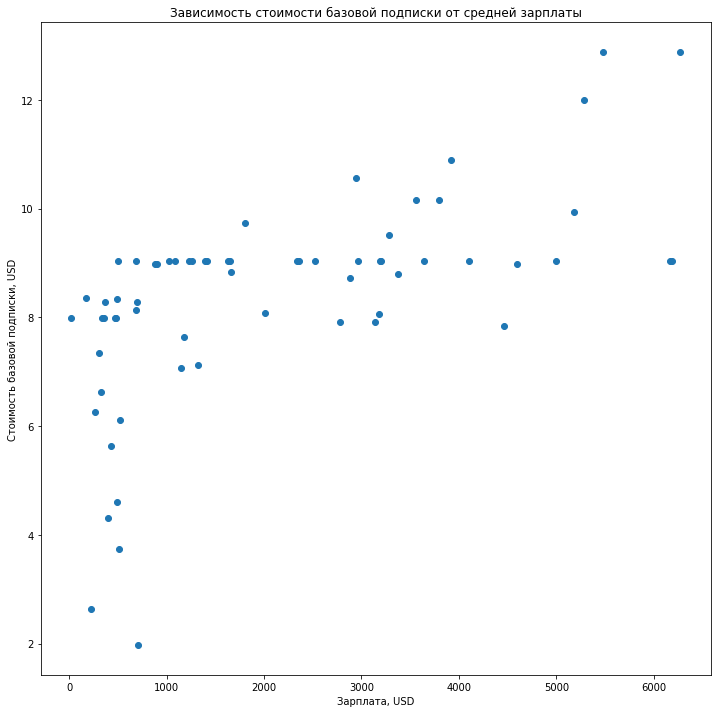

In [399]:
plt.figure(figsize=(12, 12))
plt.title('Зависимость стоимости базовой подписки от средней зарплаты')
plt.xlabel('Зарплата, USD')
plt.ylabel('Стоимость базовой подписки, USD')
plt.scatter(y=df['Cost Per Month - Basic ($)'], x=df['avg_wage'])
plt.show()

In [396]:
df['mean_price'] = df[['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)',
                      'Cost Per Month - Premium ($)']].mean(axis=1)

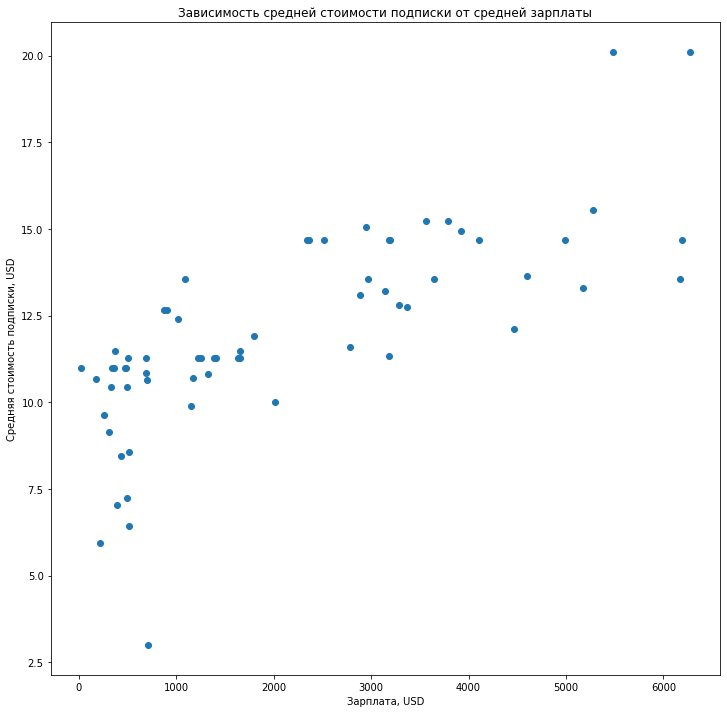

In [400]:
plt.figure(figsize=(12, 12))
plt.title('Зависимость средней стоимости подписки от средней зарплаты')
plt.xlabel('Зарплата, USD')
plt.ylabel('Средняя стоимость подписки, USD')
plt.scatter(y=df['mean_price'], x=df['avg_wage'])
plt.show()

In [401]:
df['mean_price'].corr(df['avg_wage'])

0.7450533532784581

#### Средняя цена подписки в зависимости от валюты

In [394]:
df['mean_price'] = df[['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)',
                      'Cost Per Month - Premium ($)']].mean(axis=1)

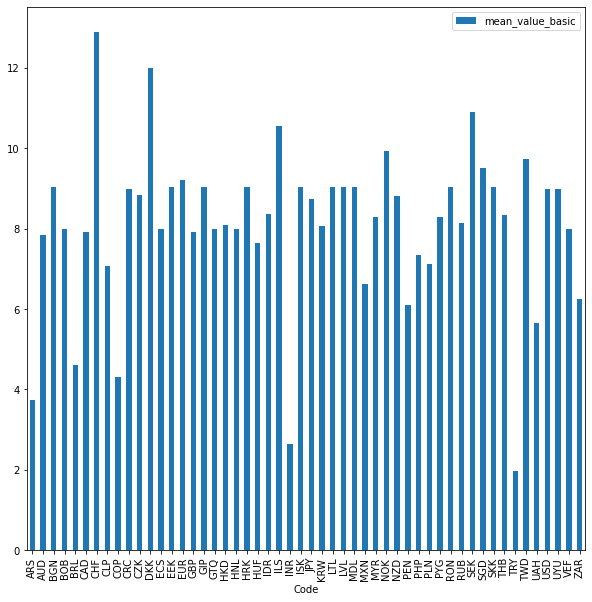

In [436]:
groupped_basic = df[['Cost Per Month - Basic ($)', 'Code']].groupby(by='Code')\
                                                           .agg(mean_value_basic=('Cost Per Month - Basic ($)','mean'))
groupped_basic.plot.bar(figsize=(10, 10))
plt.show()

In [421]:
groupped_basic

,mean_value_basic
Code,
ARS,3.740000
AUD,7.840000
BGN,9.030000
BOB,7.990000
BRL,4.610000
CAD,7.910000
CHF,12.880000
CLP,7.070000
COP,4.310000


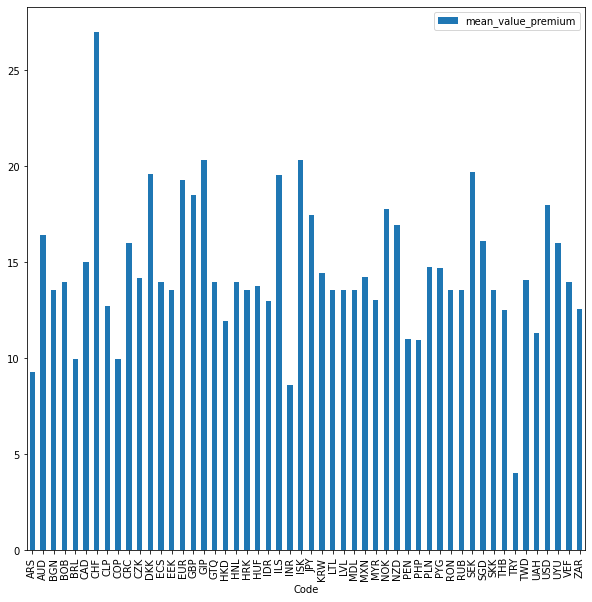

In [427]:
groupped_premium = df[['Cost Per Month - Premium ($)', 'Code']].groupby(by='Code')\
                                                               .agg(mean_value_premium=('Cost Per Month - Premium ($)',
                                                                                        'mean'))
groupped_premium.plot.bar(figsize=(10,10))
plt.show()

In [418]:
groupped_premium

,mean_value_premium
Code,
ARS,9.260000
AUD,16.390000
BGN,13.540000
BOB,13.990000
BRL,9.960000
CAD,15.030000
CHF,26.960000
CLP,12.740000
COP,9.930000


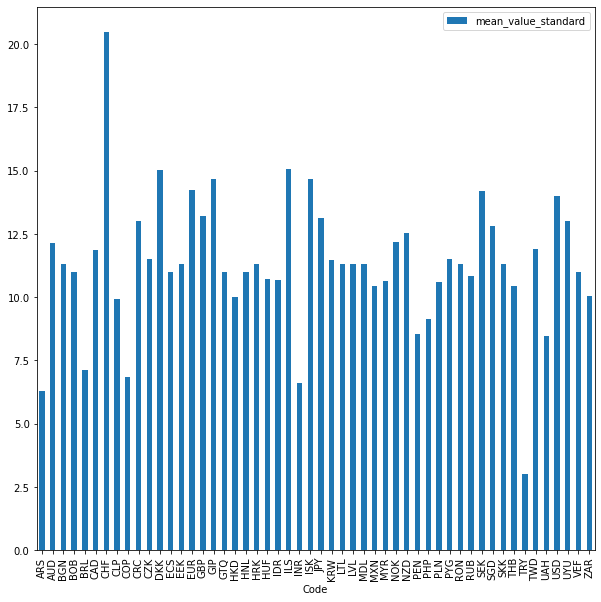

In [428]:
groupped_standard = df[['Cost Per Month - Standard ($)', 'Code']].groupby(by='Code').agg(mean_value_standard=\
                                                                                    ('Cost Per Month - Standard ($)',
                                                                                     'mean'))
groupped_standard.plot.bar(figsize=(10,10))
plt.show()

In [424]:
groupped_standard

,mean_value_standard
Code,
ARS,6.300000
AUD,12.120000
BGN,11.290000
BOB,10.990000
BRL,7.110000
CAD,11.870000
CHF,20.460000
CLP,9.910000
COP,6.860000


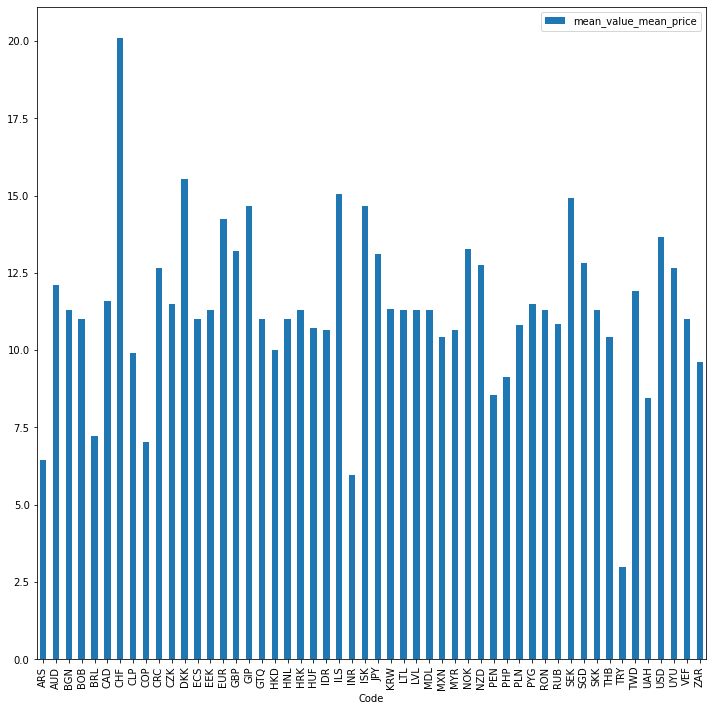

In [426]:
groupped_mean_price = df[['mean_price', 'Code']].groupby(by='Code').agg(mean_value_mean_price=('mean_price', 'mean'))
groupped_mean_price.plot.bar(figsize=(12,12))
plt.show()

In [431]:
groupped_mean_price

,mean_value_mean_price
Code,
ARS,6.433333
AUD,12.116667
BGN,11.286667
BOB,10.990000
BRL,7.226667
CAD,11.603333
CHF,20.100000
CLP,9.906667
COP,7.033333


#### Зависимость от континента

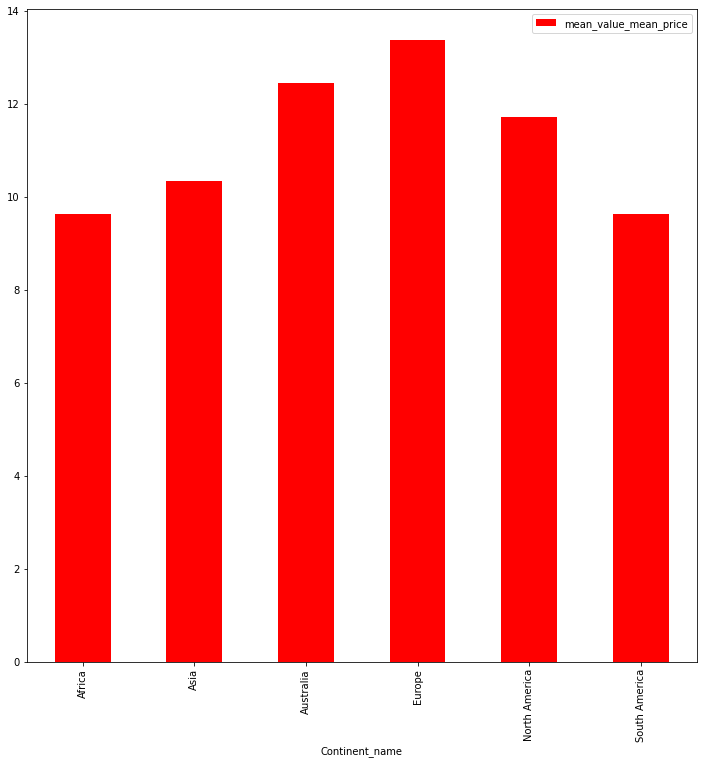

In [434]:
groupped_mean_price_by_continent = df[['mean_price', 'Continent_name']].groupby(by='Continent_name')\
                                                          .agg(mean_value_mean_price=('mean_price', 'mean'))
groupped_mean_price_by_continent.plot.bar(figsize=(12,12), color='r')
plt.show()

#### Стоимость подписки относительно среднего дохода за месяц в Чехии 

##### Standard

In [445]:
df[df['Country_code'] == 'CZ']['Cost Per Month - Standard ($)'] / df[df['Country_code'] == 'CZ']['avg_wage']

12    0.006922
dtype: float64

##### Basic

In [446]:
df[df['Country_code'] == 'CZ']['Cost Per Month - Basic ($)'] / df[df['Country_code'] == 'CZ']['avg_wage']

12    0.00532
dtype: float64

##### Premium

In [447]:
df[df['Country_code'] == 'CZ']['Cost Per Month - Premium ($)'] / df[df['Country_code'] == 'CZ']['avg_wage']

12    0.008525
dtype: float64

#### Какие топ-5 стран имеют самую большую доступную коллекцию сериалов

In [448]:
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),CountryCode,Currency,Code,avg_wage,Continent_code,Continent_name,mean_price
0,AR,Argentina,4760,3154,1606,3.74,6.30,9.26,AR,Peso,ARS,514.35,SA,South America,6.433333
1,AU,Australia,6114,4050,2064,7.84,12.12,16.39,AU,Australian Dollars,AUD,4467.33,OC,Australia,12.116667
2,AT,Austria,5640,3779,1861,9.03,14.67,20.32,AT,Euros,EUR,3187.14,EU,Europe,14.673333
3,BE,Belgium,4990,3374,1616,10.16,15.24,20.32,BE,Euros,EUR,3793.23,EU,Europe,15.240000
4,BO,Bolivia,4991,3155,1836,7.99,10.99,13.99,BO,Boliviano,BOB,483.22,SA,South America,10.990000


In [456]:
df.sort_values(by='No. of TV Shows', ascending=False)[['Country', 'No. of TV Shows']].head()

,Country,No. of TV Shows
12,Czechia,5234
51,Slovakia,5055
6,Bulgaria,4819
24,Hungary,4802
61,United Kingdom,4551


#### Какой процент среднего дохода россиянина будет составлять подписка Netflix?

Посчитаем для трех случаев отдельно

#### Basic

In [481]:
percent_of_avg_wage_by_basic = (df[df['Country_code'] == 'RU']['Cost Per Month - Basic ($)'] / \
                                df[df['Country_code'] == 'RU']['avg_wage']).values[0]
print(f'Процент среднего дохода для basic {percent_of_avg_wage_by_basic * 100:.2f}%')

Процент среднего дохода 1.18%


#### Standard

In [482]:
percent_of_avg_wage_by_standard = (df[df['Country_code'] == 'RU']['Cost Per Month - Standard ($)'] / \
                                df[df['Country_code'] == 'RU']['avg_wage']).values[0]
print(f'Процент среднего дохода для standard {percent_of_avg_wage_by_standard * 100:.2f}%')

Процент среднего дохода для standard 1.57%


#### Premium

In [483]:
percent_of_avg_wage_by_standard = (df[df['Country_code'] == 'RU']['Cost Per Month - Premium ($)'] / \
                                df[df['Country_code'] == 'RU']['avg_wage']).values[0]
print(f'Процент среднего дохода для premium {percent_of_avg_wage_by_standard * 100:.2f}%')

Процент среднего дохода для premium 1.96%


#### На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)

Сначала посчитаем cost per title

In [484]:
for col in ['Basic', 'Standard', 'Premium']:
    df[f'cost_by_title_{col}'] = df[f'Cost Per Month - {col} ($)'] / df['Total Library Size']


In [486]:
df.sort_values(by=['cost_by_title_Basic', 'cost_by_title_Standard', 'cost_by_title_Premium'])

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),CountryCode,Currency,Code,avg_wage,Continent_code,Continent_name,mean_price,cost_by_title_Basic,cost_by_title_Standard,cost_by_title_Premium
59,TR,Turkey,4639,2930,1709,1.97,3.00,4.02,TR,Lira,TRY,706.53,AS,Asia,2.996667,0.000425,0.000647,0.000867
26,IN,India,5843,3718,2125,2.64,6.61,8.60,IN,Indian Rupee,INR,222.53,AS,Asia,5.950000,0.000452,0.001131,0.001472
0,AR,Argentina,4760,3154,1606,3.74,6.30,9.26,AR,Peso,ARS,514.35,SA,South America,6.433333,0.000786,0.001324,0.001945
9,CO,Colombia,4991,3156,1835,4.31,6.86,9.93,CO,Peso,COP,398.07,SA,South America,7.033333,0.000864,0.001374,0.001990
5,BR,Brazil,4972,3162,1810,4.61,7.11,9.96,BR,Brazil,BRL,493.00,SA,South America,7.226667,0.000927,0.001430,0.002003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,SE,Sweden,4361,2973,1388,10.90,14.20,19.70,SE,Krona,SEK,3919.52,EU,Europe,14.933333,0.002499,0.003256,0.004517
13,DK,Denmark,4558,2978,1580,12.00,15.04,19.60,DK,Danish Krone,DKK,5279.18,EU,Europe,15.546667,0.002633,0.003300,0.004300
49,SM,San Marino,2310,1937,373,9.03,14.67,20.32,SM,Euros,EUR,2340.36,EU,Europe,14.673333,0.003909,0.006351,0.008797
11,HR,Croatia,2274,1675,599,9.03,11.29,13.54,HR,Croatian Dinar,HRK,1393.37,EU,Europe,11.286667,0.003971,0.004965,0.005954


In [497]:
for col in ['Basic', 'Standard', 'Premium']:
    df[f'rank_by_{col}'] = df[f'cost_by_title_{col}'].rank(axis=0, method='dense')

In [506]:
df[['Country', 'cost_by_title_Basic', 'rank_by_Basic']].sort_values(by='cost_by_title_Basic')

,Country,cost_by_title_Basic,rank_by_Basic
59,Turkey,0.000425,1.0
26,India,0.000452,2.0
0,Argentina,0.000786,3.0
9,Colombia,0.000864,4.0
5,Brazil,0.000927,5.0
...,...,...,...
55,Sweden,0.002499,61.0
13,Denmark,0.002633,62.0
49,San Marino,0.003909,63.0
11,Croatia,0.003971,64.0


In [503]:
df[df.Country_code == 'RU'][['rank_by_Basic', 'rank_by_Standard', 'rank_by_Premium']]

,rank_by_Basic,rank_by_Standard,rank_by_Premium
48,26.0,18.0,18.0


Итого, Россия на 26, 18, 18 местах для базовой, стандартной и Премиум подписок соответственно!

#### В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

Сделаем вывод на основании 

In [513]:
df[df['Total Library Size'] > 6000].sort_values(by=['rank_by_Basic', 'rank_by_Standard',
                                                   'rank_by_Premium'])

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),CountryCode,Currency,...,avg_wage,Continent_code,Continent_name,mean_price,cost_by_title_Basic,cost_by_title_Standard,cost_by_title_Premium,rank_by_Basic,rank_by_Standard,rank_by_Premium
24,HU,Hungary,6884,4802,2082,7.64,10.71,13.78,HU,Forint,...,1175.85,EU,Europe,10.710000,0.001110,0.001556,0.002002,8.0,7.0,9.0
44,PH,Philippines,6362,4154,2208,7.35,9.14,10.93,PH,Peso,...,308.80,AS,Asia,9.140000,0.001155,0.001437,0.001718,9.0,6.0,3.0
61,GB,United Kingdom,6643,4551,2092,7.91,13.20,18.48,GB,Sterling,...,3142.31,EU,Europe,13.196667,0.001191,0.001987,0.002782,10.0,22.0,28.0
12,CZ,Czechia,7325,5234,2091,8.83,11.49,14.15,CZ,Koruna,...,1659.91,EU,Europe,11.490000,0.001205,0.001569,0.001932,11.0,8.0,5.0
7,CA,Canada,6239,4311,1928,7.91,11.87,15.03,CA,Canadian Dollar,...,2785.00,NA,North America,11.603333,0.001268,0.001903,0.002409,13.0,19.0,19.0
1,AU,Australia,6114,4050,2064,7.84,12.12,16.39,AU,Australian Dollars,...,4467.33,OC,Australia,12.116667,0.001282,0.001982,0.002681,14.0,20.0,25.0
51,SK,Slovakia,7035,5055,1980,9.03,11.29,13.54,SK,Koruna,...,1412.78,EU,Europe,11.286667,0.001284,0.001605,0.001925,15.0,10.0,4.0
6,BG,Bulgaria,6797,4819,1978,9.03,11.29,13.54,BG,Lev,...,691.59,EU,Europe,11.286667,0.001329,0.001661,0.001992,17.0,11.0,8.0
28,IE,Ireland,6486,4515,1971,9.03,14.67,20.32,IE,Euros,...,4105.28,EU,Europe,14.673333,0.001392,0.002262,0.003133,18.0,34.0,40.0
34,LT,Lithuania,6462,4490,1972,9.03,11.29,13.54,LT,Lita,...,1631.74,EU,Europe,11.286667,0.001397,0.001747,0.002095,21.0,13.0,11.0


<AxesSubplot:>

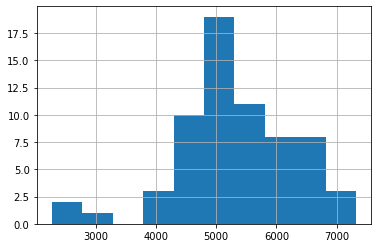

In [512]:
df['Total Library Size'].hist()

Для принятия решения воспользуемся предположением, что мы хотим одновременно платить достаточно мало, при этом получив достаточно много контента. Поэтому просто введем некоторую границу, ниже которой мы не хотим иметь общее количество фильмов и сериалов, а затем посмотрим самые лучшие предложения (наименьшее cost per title) в разрезе подписок. Идея заключается в том, что если мы выбираем VPN другой страны, чтобы купить подписку, то наиболее вероятно, что мы захотим брать базовую (максимальная экономия) - в таком случае, лучшее предложение будет у пользователей из **Венгрии**.

Если пользователь готов потратиться на премиум, то предложение из **Филиппин** окажется более выгодно. **Тем ни менее**, ниже показано, что разница не такая существенная, чтобы пытаться это реализовать в жизнь.

In [526]:
(df[df['Country_code'] == 'RU']['Cost Per Month - Premium ($)']).values[0] - \
    (df[df['Country_code'] == 'PH']['Cost Per Month - Premium ($)']).values[0]

2.630000000000001

In [528]:
(-(df[df['Country_code'] == 'RU']['cost_by_title_Premium']).values[0] + \
    (df[df['Country_code'] == 'PH']['cost_by_title_Premium']).values[0] ) / \
    (df[df['Country_code'] == 'RU']['cost_by_title_Premium']).values[0]

-0.2764326397795169

В относительных долях выгода получается 0.27 (в ценах за один фильм), что очень серьезно, в абсолютных значениях - 2.63$, вряд ли можно найти достаточно качественный ВПН за такую цену (Premium же нужен для высокого расширения)